# Notebook for Response Article

-- Lauren Fonteyn (2017)

---

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns

from supsmu import supsmu

# This sets reasonable defaults for font size for
# a figure that will go in a paper
sns.set_context("paper")

# Set the font to be serif, rather than sans
sns.set(font='serif')

# Make the background white, and specify the
# specific font family
sns.set_style("whitegrid", {
    "font.family": "serif",
    "font.serif": ["Palatino", "Times", "serif"]
})

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)

In [143]:
df = pd.read_csv("author_VG_NG-1.csv", sep=";").sort_values(by='year')

In [144]:
df['VG_norm'] = df.VG / (df.VG + df.NG)
df['NG_norm'] = df.NG / (df.VG + df.NG)

In [145]:
df.head()

,author_id,year,VG,NG,Period,VG_norm,NG_norm
53,eliz,1571,3,2,E2,0.600000,0.400000
158,thoward2,1571,48,79,E2,0.377953,0.622047
155,stow,1580,0,13,E2,0.000000,1.000000
104,madox,1582,10,13,E2,0.434783,0.565217
169,wcecil,1588,0,2,E2,0.000000,1.000000


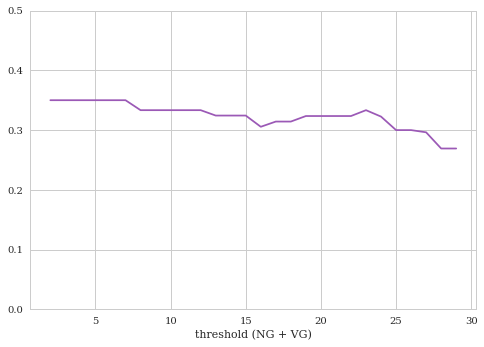

In [165]:
fractions = []
for i in range(2, 30):
    d = df[(df.VG + df.NG) >= i].copy()
    d['Only VG'] = (d['VG_norm'] == 1).astype(int)
    period_grouping = d.groupby('Period')
    d = period_grouping.sum()
    d['Authors total'] = period_grouping.author_id.apply(len)
    s = d['Only VG'] / d['Authors total']
    fractions.append(s['L1'])
    
plt.plot(range(2, 30), fractions)
plt.ylim(0, 0.5)
plt.xlabel("threshold (NG + VG)");

In [147]:
df = df[(df.VG + df.NG) >= 5]
df.head()

,author_id,year,VG,NG,Period,VG_norm,NG_norm
53,eliz,1571,3,2,E2,0.600000,0.400000
158,thoward2,1571,48,79,E2,0.377953,0.622047
155,stow,1580,0,13,E2,0.000000,1.000000
104,madox,1582,10,13,E2,0.434783,0.565217
65,gawdy,1589,4,8,E2,0.333333,0.666667


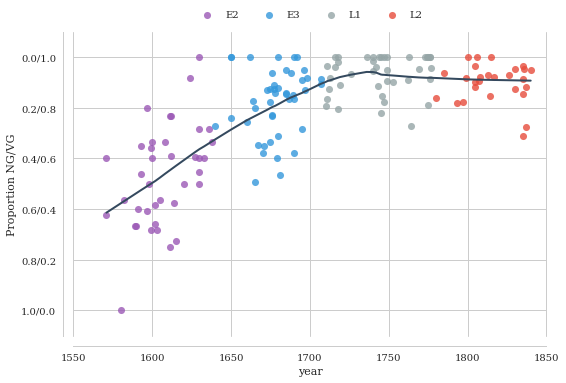

In [148]:
smooth = supsmu(df.year, df.VG_norm)
ax = sns.lmplot(x='year', y='VG_norm', hue='Period', data=df, 
                fit_reg=False, size=5, aspect=1.5, legend=False, scatter_kws={"s": 50})
plt.plot(df.year, smooth, color="#34495e", linewidth=2)
lgd = plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=4, markerscale=1)
plt.ylim(-0.1, 1.1)
plt.xlim(1550, 1850)
plt.ylabel("Proportion NG/VG")
plt.yticks(np.arange(0, 1.2, 0.2), ["1.0/0.0", "0.8/0.2", "0.6/0.4", "0.4/0.6", "0.2/0.8", "0.0/1.0"])
sns.despine(offset=10);

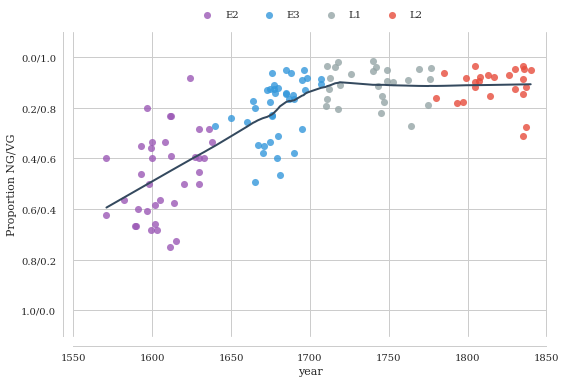

In [149]:
df_f = df[(df.VG_norm > 0) & (df.VG_norm < 1)]
smootha = supsmu(df_f.year, df_f.VG_norm)
ax = sns.lmplot(x='year', y='VG_norm', hue='Period', data=df_f, 
                fit_reg=False, size=5, aspect=1.5, legend=False, scatter_kws={"s": 50})
plt.plot(df_f.year, smootha, color="#34495e", linewidth=2)
lgd = plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=4, markerscale=1)
plt.ylim(-0.1, 1.1)
plt.xlim(1550, 1850)
plt.ylabel("Proportion NG/VG")
plt.yticks(np.arange(0, 1.2, 0.2), ["1.0/0.0", "0.8/0.2", "0.6/0.4", "0.4/0.6", "0.2/0.8", "0.0/1.0"])
sns.despine(offset=10);

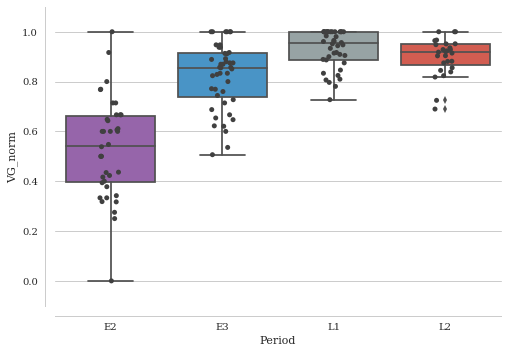

In [150]:
ax = sns.boxplot(x='Period', y='VG_norm', data=df)
ax = sns.stripplot(x="Period", y="VG_norm", data=df, color=".25", jitter=True)
plt.ylim(-0.1, 1.1)
sns.despine(offset=10);

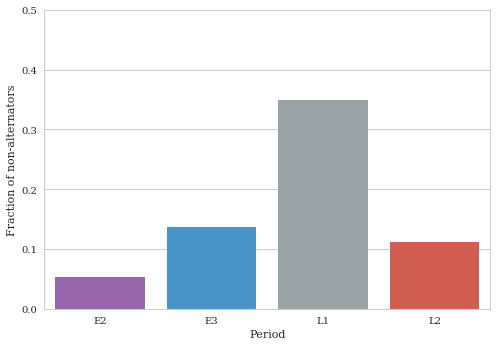

In [151]:
df['Non-alternating total'] = df['VG_norm'].isin((0, 1)).astype(int)
sns.barplot(x='Period', y='Non-alternating total', data=df, ci=None)
plt.ylabel("Fraction of non-alternators")
plt.ylim(0, 0.5)
plt.xlabel("Period");

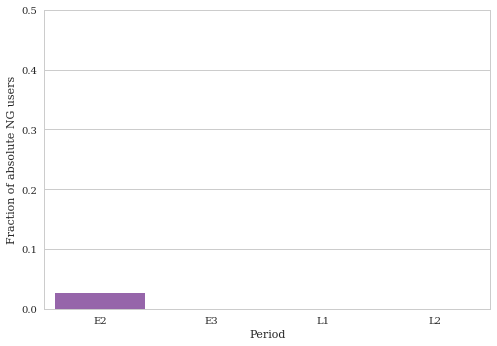

In [152]:
df['Only NG'] = (df['NG_norm'] == 1).astype(int)
sns.barplot(x='Period', y='Only NG', data=df, ci=None)
plt.ylabel("Fraction of absolute NG users")
plt.xlabel("Period")
plt.ylim(0, 0.5);

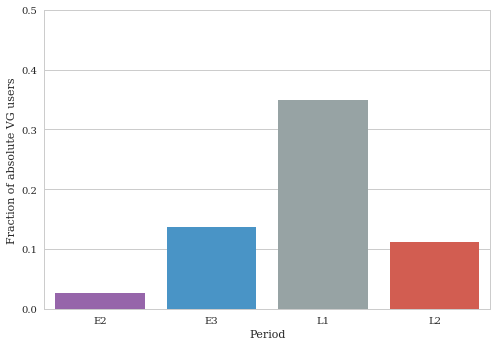

In [153]:
df['Only VG'] = (df['VG_norm'] == 1).astype(int)
sns.barplot(x='Period', y='Only VG', data=df, ci=None)
plt.ylabel("Fraction of absolute VG users")
plt.ylim(0, 0.5)
plt.xlabel("Period");

In [163]:
period_grouping = df.groupby('Period')

# drop some garbage columns
tab = period_grouping.sum().drop(['year', 'VG_norm', 'NG_norm'], 1)

# compute number of unique authors per period
tab['Authors total'] = period_grouping.author_id.apply(len)

# compute number of alternating authors per period
tab['Alternating'] = tab['Authors total'] - tab['Non-alternating total']

# order columns
tab = tab[['VG', 'NG', 'Authors total', 'Alternating', 'Non-alternating total', 'Only NG', 'Only VG']]

tab['Only VG'] = tab['Only VG'].astype(str) + ' ' + (tab['Only VG'] / tab['Authors total']).map('({:.0%})'.format)
tab['Only NG'] = tab['Only NG'].astype(str) + ' ' + (tab['Only NG'] / tab['Authors total']).map('({:.0%})'.format)
tab['Alternating'] = tab['Alternating'].astype(str) + ' ' + (tab['Alternating'] / tab['Authors total']).map('({:.0%})'.format)
tab['Non-alternating total'] = tab['Non-alternating total'].astype(str) + ' ' + (tab['Non-alternating total'] / tab['Authors total']).map('({:.0%})'.format)
tab

,VG,NG,Authors total,Alternating,Non-alternating total,Only NG,Only VG
Period,,,,,,,
E2,580,602,38,36 (95%),2 (5%),1 (3%),1 (3%)
E3,1236,300,44,38 (86%),6 (14%),0 (0%),6 (14%)
L1,1655,149,40,26 (65%),14 (35%),0 (0%),14 (35%)
L2,1253,138,27,24 (89%),3 (11%),0 (0%),3 (11%)
